# Final Project Presentation 

## Yijia Wu

Instructions: 

1. Replace "yourname" with your name. 
2. Put your analyses here. Make sure to run your cells, so we see the output! You're not required to put any prose here, but you can, if you want. Just keep in mind that it might not be very legible or practical for your audience to read much during your presentation. 
3. Make your notebook into a GitHub Gist by dragging and dropping it to [gist.github.com](https://gist.github.com/). 
4. Post the URL of your gist to the chatroom. During your presentation, you'll open your gist on my computer.

# East meets West: An Exploration of the Cultural Conflicts in Mother-and-daughter Relationship Based on the Text of _the Joy Luck Club_

In [56]:
from nltk import word_tokenize, sent_tokenize, ngrams, pos_tag
from nltk.text import Text
import pandas as pd
import numpy as np
from collections import Counter
from more_itertools import chunked
from nltk.corpus import brown
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load the Joy Luck Club
club = open('the_joy_luck_club.md').read()

# 1. What? - General Exploration

## 1.1 Theme/Motif Searching: Distinctive Words in _the Joy Luck Club_

In [3]:
clubTokens = word_tokenize(club)

In [4]:
# Define punctuation
punctuations = '''!()-[]{};:'",,,''<>./?@#$%^&*_~’'''
# Remove punctuation from the string
no_punct = ""
for item in club:
    if item not in punctuations:
        no_punct = no_punct + item

In [5]:
clubnopunctTokens = word_tokenize(no_punct.lower())

In [6]:
#load the fiction words in brown
ficWords = brown.words(categories=['fiction'])
ficWordsL = [word.lower() for word in ficWords]

In [7]:
#make counts
clubCounts = Counter(clubnopunctTokens)
ficCounts = Counter(ficWords)

In [8]:
#make a dataframe of these counts
df = pd.DataFrame([clubCounts, ficCounts], 
                  index=['club', 'fic']).T.fillna(0)

In [9]:
#add frequencies
df['clubF'] = df['club']/len(clubTokens)
df['ficF'] = df['fic']/len(ficWordsL)

In [10]:
#define clubiness
df['clubiness'] = df['clubF']- df['ficF']

In [11]:
#sort the most distinctive words
df.sort_values('clubiness', ascending=False)

,club,fic,clubF,ficF,clubiness
i,3339.0,0.0,0.029703,0.000000,0.029703
my,1959.0,119.0,0.017427,0.001738,0.015689
she,1441.0,280.0,0.012819,0.004088,0.008730
mother,654.0,9.0,0.005818,0.000131,0.005686
me,809.0,137.0,0.007197,0.002000,0.005196
her,1113.0,397.0,0.009901,0.005797,0.004104
this,679.0,147.0,0.006040,0.002146,0.003894
you,814.0,236.0,0.007241,0.003446,0.003795
so,540.0,115.0,0.004804,0.001679,0.003125
is,571.0,144.0,0.005079,0.002103,0.002977


### The core theme in _the Joy Luck Club_ is the mother-and-daughter relationship.

## 1.2 Narrow Down: A stylometry comparison between narratives of mothers and daughters

In [12]:
#split it into several parts according to different stories(narratives) in this novel
clubParts = club.split('%%%%%')

In [13]:
#name these parts
#about the name:
#'a/b/c/d' refers to different chapters
#'intro' refers to the introduction part of a chapter
#'name(jingmei/anmei/...)' refers to the narrator of the story
#'D/M' refers to whether the narrator is daughter or mother
#'1/2/3/4' refers to the time that this narrator appears

a_intro = clubParts[1]
a_jingmeiD_1 = clubParts[2]
a_anmeiM_1 = clubParts[3]
a_lindoM_1 = clubParts[4]
a_yingyingM_1 = clubParts[5]

b_intro = clubParts[6]
b_waverlyD_1 = clubParts[7]
b_lenaD_1 = clubParts[8]
b_roseD_1 = clubParts[9]
b_jingmeiD_2 = clubParts[10]

c_intro = clubParts[11]
c_lenaD_2 = clubParts[12]
c_waverlyD_2 = clubParts[13]
c_roseD_2 = clubParts[14]
c_jingmeiD_3 = clubParts[15]

d_intro = clubParts[16]
d_anmeiM_2 = clubParts[17]
d_yingyingM_2 = clubParts[18]
d_lindoM_2 = clubParts[19]
d_jingmeiD_4 = clubParts[20]

In [14]:
allParts = [a_intro, a_jingmeiD_1, a_anmeiM_1, a_lindoM_1, a_yingyingM_1, 
            b_intro, b_waverlyD_1, b_lenaD_1, b_roseD_1, b_jingmeiD_2, 
            c_intro, c_lenaD_2, c_waverlyD_2, c_roseD_2, c_jingmeiD_3, 
            d_intro, d_anmeiM_2, d_yingyingM_2, d_lindoM_2, d_jingmeiD_4]

In [15]:
#make labels
allPartsLabels = ['a_intro', 'a_jingmeiD_1', 'a_anmeiM_1', 'a_lindoM_1', 'a_yingyingM_1', 
                  'b_intro', 'b_waverlyD_1', 'b_lenaD_1', 'b_roseD_1', 'b_jingmeiD_2', 
                  'c_intro', 'c_lenaD_2', 'c_waverlyD_2', 'c_roseD_2', 'c_jingmeiD_3', 
                  'd_intro', 'd_anmeiM_2', 'd_yingyingM_2', 'd_lindoM_2', 'd_jingmeiD_4']

In [16]:
mothersList = [a_anmeiM_1, a_lindoM_1, a_yingyingM_1, d_anmeiM_2, d_yingyingM_2, d_lindoM_2]
daughtersList = [a_jingmeiD_1, b_waverlyD_1, b_lenaD_1, b_roseD_1, b_jingmeiD_2, c_lenaD_2, 
             c_waverlyD_2, c_roseD_2, c_jingmeiD_3, d_jingmeiD_4]

In [17]:
mothers = ''.join(mothersList)
daughters = ''.join(daughtersList)

In [18]:
# initialize the vectorizer
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [19]:
#calculate the term frequencies of each word, and make the resulting matrix dense
tfidf = TfidfVectorizer(use_idf=True, 
                        stop_words='english', min_df=2, max_df=.5)

In [20]:
tfTable = tfidf.fit_transform(allParts).todense()

In [21]:
#reduce the dimensions to 2 using PCA
pca= PCA(n_components=2)

In [22]:
pcaOut = pca.fit_transform(tfTable)

/Users/sigrid/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/sigrid/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


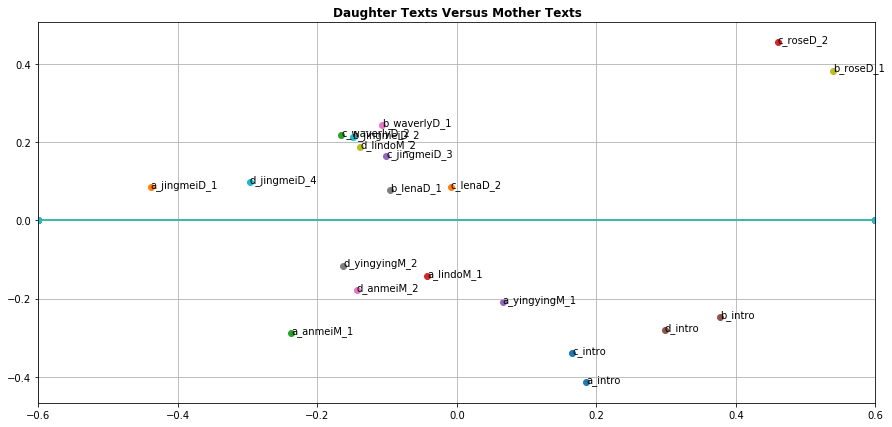

In [23]:
plt.rcParams['figure.figsize'] = [15, 7]
#plot the results
xs, ys = pcaOut[:,0],pcaOut[:,1]
x1, y1 = [-0.6,0.6], [0,0]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(allPartsLabels[i], (xs[i],ys[i]))
    plt.xlim(-0.6,0.6)
    plt.plot(x1, y1, marker = 'o')
ax = plt.subplot(111)
ax.grid('on')
ax.set_title('Daughter Texts Versus Mother Texts')
ttl = ax.title
ttl.set_weight('bold')

### There are remarkable differences between mothers and daughters text.

## Hypothesis: Conflicts is the dominant tone of mother-daughter relationship in _the Joy Luck Club_.

# 2. Why? - Test One

## 2.1 POS - the most common adjectives

In [24]:
cTokens = word_tokenize(club)
mTokens = word_tokenize(mothers)
dTokens = word_tokenize(daughters)

In [25]:
#make counts
cCounts = Counter(cTokens)
mCounts = Counter(mTokens)
dCounts = Counter(dTokens)

In [26]:
cPOS = pos_tag(cTokens)
mPOS = pos_tag(mTokens)
dPOS = pos_tag(dTokens)

In [27]:
cwords = [pair[0] for pair in cPOS]
cpos = [pair[1] for pair in cPOS]
mwords = [pair[0] for pair in mPOS]
mpos = [pair[1] for pair in mPOS]
dwords = [pair[0] for pair in dPOS]
dpos = [pair[1] for pair in dPOS]

In [28]:
def getA(taggedText): 
    a = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            a.append(word)
    return a
clubA = getA(cPOS)
Counter(clubA).most_common(30)

[('other', 156),
 ('same', 140),
 ('little', 138),
 ('Chinese', 135),
 ('old', 121),
 ('many', 116),
 ('good', 114),
 ('new', 91),
 ('first', 91),
 ('next', 82),
 ('own', 81),
 ('much', 73),
 ('bad', 72),
 ('small', 68),
 ('long', 66),
 ('white', 65),
 ('big', 63),
 ('black', 63),
 ('large', 57),
 ('true', 55),
 ('right', 55),
 ('last', 54),
 ('red', 52),
 ('American', 49),
 ('few', 45),
 ('different', 43),
 ('young', 43),
 ('terrible', 41),
 ('open', 41),
 ('dark', 40)]

### What we know from the list:
a)The most_common adjectives are all contrasting pairs (in other words, almost any of the words can find its opposite word in the list). These pairs include: other-own; little-many; Chinese-American; old-new/young; good-bad/terrible; first-last; much-few; small-big/large; black-white. This proves our hypothesis.
b)Three color appears quite often: black, white, red. What do they symbolize? Since white people are the dominant race in the USA; red is the traditional color of China; black always refers to death. My hypothesis is white symbolizes American culture; red stands for Chinese values; black refers to the pain in life.
c)"Other" is the most frequent adjective. Why?

In [29]:
def redN(taggedText):
    redNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'red': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP']:
                redNs.append(bigram[1][0])
    return redNs

In [30]:
def blackN(taggedText):
    blackNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'black': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP']:
                blackNs.append(bigram[1][0])
    return blackNs

In [31]:
def whiteN(taggedText):
    whiteNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'white': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP']:
                whiteNs.append(bigram[1][0])
    return whiteNs

In [32]:
whiteCount = Counter(whiteN(cPOS)).most_common(20)
blackCount = Counter(blackN(cPOS)).most_common(20)
redCount = Counter(redN(cPOS)).most_common(20)

In [33]:
frequencies = pd.DataFrame([whiteCount,blackCount, redCount],
                          index = ['white thing', 'black thing', 'red thing'])

In [34]:
frequencies = frequencies.fillna(0).T
frequencies 

,white thing,black thing,red thing
0,"(cotton, 3)","(side, 4)","(candle, 5)"
1,"(squares, 3)","(lacquer, 3)","(banners, 3)"
2,"(dress, 3)","(vase, 3)","(bean, 2)"
3,"(skin, 2)","(ash, 2)","(thumbs, 2)"
4,"(knight, 2)","(mole, 2)","(jade, 2)"
5,"(pieces, 2)","(bands, 2)","(palanquin, 2)"
6,"(sheets, 2)","(pawn, 2)","(scarf, 2)"
7,"(mists, 1)","(slits, 2)","(sweater, 2)"
8,"(chenille, 1)","(legs, 2)","(wood, 1)"
9,"(winter, 1)","(wings, 2)","(tile, 1)"


In [35]:
def otherX(taggedText):
    otherXs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'other': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP']:
                otherXs.append(bigram[0][0] + ' ' + bigram[1][0])
    return otherXs

In [36]:
Counter(otherX(cPOS)).most_common(20)

[('other side', 15),
 ('other people', 14),
 ('other servants', 4),
 ('other day', 4),
 ('other daughters', 3),
 ('other children', 3),
 ('other cities', 3),
 ('other ladies', 3),
 ('other boats', 2),
 ('other men', 2),
 ('other half', 2),
 ('other ways', 2),
 ('other way', 2),
 ('other friends', 1),
 ('other city', 1),
 ('other bag', 1),
 ('other world', 1),
 ('other lady', 1),
 ('other time', 1),
 ('other boy', 1)]

### The results of 2.1 proves conflicts is the leading tone and suggest us to focus on the cultural conflicts: 
a) the adjectives are contrasting pairs b) color words have connections with cultures c) the function of "other" is to make comparisons. So roughly, we can conclude: Amy Tan uses a lot of contrasts and cultural symbols. Based on such findings, I hypothesis the cultural factors contribute most to the conflicts between the main characters.

## 2.2 POS - the most common nouns

In [37]:
def getN(taggedText): 
    n = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'NN': 
            n.append(word)
    return n
clubN = getN(cPOS)
Counter(clubN).most_common(10)

[('mother', 725),
 ('father', 186),
 ('time', 163),
 ('way', 151),
 ('day', 138),
 ('house', 131),
 ('face', 123),
 ('girl', 121),
 ('family', 116),
 ('head', 104)]

### The results of 2.2 further emphasizes on culture:
"Mother," "father," "girl," "family" are the main characters in the novel. "Time" and "day" are time settings. But how can "face" appear 123 times in the book? "Face," which is written as "面子" in Chinese, is a unique cultural phenomenon in Chinese culture. A face is a negotiated public image, mutually granted each other by participants in a communicative events. (Scollon, 2000: 35). In one of the concordances of "face," there is such a description of "face" by Popo, a representative of traditional Chinese value, "When you lose your face, it is like dropping your necklace down a well. The only way you can get it falls in after it." From this sentence, we can see how important "face" is to the Chinese. However, as American believes that humans are independent self-oriented individuals, there will be cultural conflicts between characters.

Question: how can cultural differences specifically influence family relations? 

## Hypothesis: People from various cultural backgrounds has various mindsets. Thus it influences family relations by the collision of communication mode and the difficulties in value acceptance. 

To find some illustrations of traumas in immigrants families caused by cultural differences, I carry out Test Two.

# 3. How - Test Two

## 3.1 Finding Distinctive Words: An Analysis of the Mother&Daughter Mindset

In [38]:
#make a dataframe of these counts
df = pd.DataFrame([clubCounts, mCounts, dCounts], 
                  index=['club', 'mothers', 'daughters']).T.fillna(0)

In [39]:
#add frequencies
df['clubF'] = df['club']*100/len(clubTokens)
df['motherF'] = df['mothers']*100/len(mTokens)
df['daughterF'] = df['daughters']*100/len(dTokens)

In [40]:
#define clubiness
df['diness'] = df['daughterF']- df['motherF']

In [41]:
#sort the most distinctive words
df.sort_values('diness', ascending=False)

,club,mothers,daughters,clubF,motherF,daughterF,diness
",",0.0,1950.0,3871.0,0.000000,4.741757,5.543383,0.801627
'',0.0,366.0,987.0,0.000000,0.889991,1.413412,0.523421
``,0.0,387.0,1008.0,0.000000,0.941056,1.443485,0.502429
n't,0.0,72.0,316.0,0.000000,0.175080,0.452521,0.277441
mother,654.0,202.0,516.0,0.581783,0.491197,0.738927,0.247729
he,571.0,107.0,301.0,0.507948,0.260189,0.431041,0.170852
we,453.0,84.0,260.0,0.402978,0.204260,0.372327,0.168067
?,0.0,122.0,314.0,0.000000,0.296664,0.449657,0.152993
Auntie,0.0,13.0,127.0,0.000000,0.031612,0.181868,0.150256
said,471.0,138.0,329.0,0.418991,0.335570,0.471137,0.135567


In [42]:
Text(dTokens).concordance("n't")

Displaying 25 of 316 matches:
ook black sesame-seed soup . '' `` Do n't show off , '' I said . `` It 's not s
s . I can never remember things I did n't understand in the first place . My mo
 behind in China and hopes they could n't begin to express in their fragile Eng
hings so strange and beautiful you ca n't ever imagine them . `` But I did n't 
 n't ever imagine them . `` But I did n't come to Kweilin to see how beautiful 
 leftovers mixed together . If it had n't been for the Japanese , there would h
 looked down on someone else . It did n't matter that everybody shared the same
o hide like wild animals . But you ca n't stay in the dark for so long . Someth
ay , I heard screaming sounds . I did n't know if it was a peasant slitting the
ng in his way on the sidewalk . I did n't go to the window to find out . What u
o with our meager allowances ! We did n't notice that the dumplings were stuffe
. We ate sparingly , not as if we did n't have enough , but to protest how we c
rget past 

In [43]:
Text(mTokens).concordance("not")

Displaying 25 of 316 matches:
d me my mother was a ghost . This did not mean my mother was dead . In those da
goose , two eggs that nobody wanted , not even good enough to crack over rice p
he said this so that the ghosts would not steal us away . So you see , to Popo 
ully . '' She told me stories I could not understand . One was about a greedy g
in a corner of my room where he could not see my face . I felt our house was so
o unhappy , but my little brother did not seem to think so . He rode his bicycl
rner of my room where my father could not watch me . I was sitting at the top o
My auntie quickly looked away and did not call her by name or offer her tea . A
her approached the bed . But this did not stop my mother . `` Come back , stay 
nd ran in many different directions , not staying long enough to see anything .
n with her white skin and oval face , not too round like Auntie 's or sharp lik
. And because I remember Popo told me not to speak her name , I stood there , m
 scold in 

### In 3.1, I find that: 
Daughter 1) ""/said pay more attention to verbal communication instead of nonverbal  2)n't/? uncertain attitude, identity recognition issue   
Mother 1)"not" also negative 2) "face" matters to mother 

Question: How exactly does it feel to have such struggle? Does Amy Tan use a particular pattern to reveal the inner world of the mothers and daughters?

Hypothesis: Amy Tan probably will use some literary device like the analogy to describe sentiments to make the plot more vivid.

## 3.2 Ngram: Finding Patterns

In [44]:
#Create an empty list
results=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def clubput(Tokens):
    for n in range(4, 8):
        clubNgrams = list(ngrams(Tokens, n))
        clubNgramCounter = Counter(clubNgrams)
        for ngram in clubNgrams:
            if clubNgramCounter[ngram]>2:
                results.append(ngram)
            if clubNgramCounter[ngram]==2:    
                results.append(ngram)

In [45]:
clubput(clubnopunctTokens)

In [46]:
#list the most common ones
Counter(results).most_common(20)

[(('the', 'joy', 'luck', 'club'), 15),
 (('as', 'if', 'she', 'were'), 15),
 (('at', 'the', 'same', 'time'), 14),
 (('as', 'if', 'she', 'had'), 13),
 (('as', 'if', 'i', 'had'), 12),
 (('as', 'if', 'i', 'were'), 10),
 (('and', 'then', 'i', 'saw'), 10),
 (('i', 'could', 'see', 'the'), 10),
 (('it', 'was', 'as', 'if'), 10),
 (('my', 'mother', 'told', 'me'), 9),
 (('for', 'the', 'first', 'time'), 9),
 (('on', 'the', 'other', 'side'), 9),
 (('the', 'other', 'side', 'of'), 9),
 (('over', 'and', 'over', 'again'), 9),
 (('my', 'mother', 'used', 'to'), 8),
 (('on', 'top', 'of', 'the'), 8),
 (('my', 'mother', 'and', 'i'), 8),
 (('the', 'side', 'of', 'the'), 8),
 (('other', 'side', 'of', 'the'), 8),
 (('even', 'though', 'i', 'was'), 8)]

The result reveals the critical themes again of the novel.

a) "The joy luck club" which is the title of the novel, ranks the first in the list. This 4-gram is the name of a weekly gathering of main characters to play mah-jong, eat good food, and gossip. It symbolizes the connection between the main characters. Frequent mentioning it can remind readers of the women's friendship, which is censorious, unsteady, competitive, but always loyal.

b) There are many "as if" phrases in the list. "As if" always makes the subordinate clause which uses the subjunctive mood. We use such a mood to talk about an imaginary situation or a situation that may not be true, but that is likely or possible. In this case, "as if she were/had", "as if I were/had" implicate the theme misunderstanding, between two generations and the cultural differences between two countries.

c) "My mother told me", "my mother used to", "my mother and I" appear a lot in the novel. These ngram corresponds to the family love, which is one of the key themes in the book since the narrators are all talking about their mothers and daughters.

d) Ngrams "for the first time" and "over and over again", "the side of the" and "other side of the", "even though I was" present us some contradictions and conflicts. The Joy Luck Club talks about a Chinese-American world, where the daughters are too American for their mothers' tastes, and the mothers are too Chinese for their daughters'. Thus, many emotions or experience become "the first time" in their life. However, their fixed mindset cannot easily change even though after their mothers or daughters have tried to challenge it "over and over again". They are just like "the side" and "other side", contrasting but connected.

But let's just back to our topic, Amy Tan's craze in using "as if" sentences.

There are so many "as if" sentences! We can count them first:

In [47]:
#Create an empty list
asifSent=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def asifput(text):
    for sent in text:
        if 'as if' in sent:
            asifSent.append(sent)
    return asifSent

In [48]:
clubSents = sent_tokenize(club)

In [49]:
asifSent_Club = asifput(clubSents)

In [50]:
len(asifSent_Club)

136

Here I make a list sorted by sentiments so that we can read the most sentimental ones.

In [51]:
asifSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in asifSent_Club]

In [52]:
#make a dataframe of these counts
df = pd.DataFrame([asifSentiments, asifSent_Club], 
                  index=['Sentiment', 'Sent']).T.fillna(0)

In [53]:
pd.set_option('display.max_colwidth', -1)

In [54]:
df.sort_values(by=['Sentiment'])[0:5]

,Sentiment,Sent
18,-1.000000,My body was writhing as if I were seized by a terrible pain.
4,-0.600000,"The others look uncomfortable, as if this were not how they intended to break some sort of bad news to me."
8,-0.500000,"They still look troubled, as if something were out of balance."
132,-0.400000,"It seemed as if I wanted to sustain my grief, to assure myself that I had cared deeply enough."
70,-0.328571,"She would say stiff words to my father and brothers, as if I had become invisible and she was talking about a rotten fish she had thrown away but which had left behind its bad smell."


In [55]:
df.sort_values(by=['Sentiment'])[131:136]

,Sentiment,Sent
11,0.6,"Because I was promised to the Huangs' son for marriage, my own family began treating me as if I belonged to somebody else."
71,0.6,"But instead, she gathered her face into a frown and stared into my eyes, as if she could force some kind of truth out of me."
112,0.7,"""Your mother,"" said Yan Chang, as if talking to herself, ""is too good for this family."""
24,0.7,"But I stayed, as if caught in a good dream."
96,0.7,She said it in a way as if this were proof—proof of something good.


### Some of them are direct and some of them are ironic. But the computer doesn't know much about ironic thing.

# 4. Conclusion

Using computational analysis and distant and close reading to Amy Tan's novel The Joy Luck Club, we can have a glimpse on the mother-daughter relationship in immigrants family. According to Tan's writing, cultural differences are the main reason for conflicts of the narrators. She use color words, contrasting adjectives and specific cultural elements to convey such a theme. Cultural differences have a significant influence on people's mindset. In immigrants families, people are especially suffered from opposite values and various communication modes, they also have serious trouble with identity recognition caused by cultural collision. Amy Tan likes explicitly using "as if" sentences to give vivid pictures of the characters. Some of these sentences are simple and direct, others are ironic and need us to understand the subtext.